# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
def dice(x):
    list = []
    for i in range(x):
        list.append(random.randint(1, 6))
    return list

dice10 = pd.DataFrame(dice(10),columns={"values"})

In [38]:
dice10

,values
0,5
1,5
2,6
3,3
4,5
5,6
6,4
7,1
8,3
9,4


#### 2.- Plot the results sorted by value.

<function matplotlib.pyplot.show(*args, **kw)>

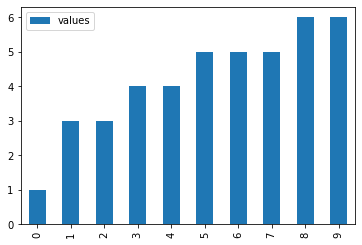

In [39]:
# your code here
diceplot = dice10.sort_values(by='values').reset_index(drop=True).plot(kind = 'bar')

plt.show

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

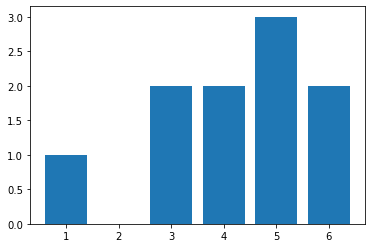

In [40]:
# your code here
dice_freq = dice10.groupby('values')['values'].count()
plt.bar(dice_freq.index, dice_freq.values)
plt.show()


In [41]:
"""
your comments here

The first plot, it's the frequency of dice
The second plot, it's the frequency of each side dice
"""

"\nyour comments here\n\nThe first plot, it's the frequency of dice\nThe second plot, it's the frequency of each side dice\n"

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [37]:
# your code here
def mean(x):
    return sum(x) / len(x)



#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [52]:
# your code here
mean(dice_freq)

2.0

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [20]:
# your code here

def median(x):
    if len(x)%2 == 0:
        median = (len(x)/2 + len(x)/2-1)/2
    else:
        median = int(len(x)/2) 
    return median

median(dice10)
    
    

4.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [26]:
# your code here
def dice_quartiles(x):
    q1 = (len(x))*0.25
    q2 = dice_median(x)
    q3 = (len(x))*0.75
    q4 = int(len(x))
    return q1,q2,q3,q4

dice_quartiles(dice10)

(2.5, 4.5, 7.5, 10)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [31]:
# your code here
df = pd.read_csv('roll_the_dice_hundred.csv')
df.sort_values(by='value')

,Unnamed: 0,roll,value
0,0,0,1
47,47,47,1
56,56,56,1
9,9,9,1
73,73,73,1
...,...,...,...
17,17,17,6
11,11,11,6
24,24,24,6
21,21,21,6


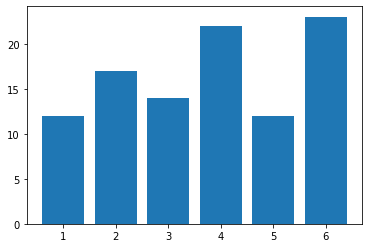

In [43]:
dice100 = df.groupby('value')['value'].count()

plt.bar(dice100.index,dice100.values)
plt.show()

In [ ]:
"""
your comments here

"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [38]:
# your code here
mean(df['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [39]:
# your code here
df['value'].value_counts()

6    23
4    22
2    17
3    14
5    12
1    12
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

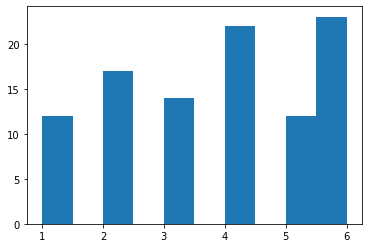

In [41]:
# your code here
plt.hist(df['value'])
plt.show()

In [ ]:
"""
your comments here
The plot confirms the average to be between 3 and 4.
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [45]:
# your code here
data = pd.read_csv('roll_the_dice_thousand.csv')
data.sort_values(by='value')
data

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5
...,...,...,...
995,995,995,1
996,996,996,4
997,997,997,4
998,998,998,3


<BarContainer object of 6 artists>

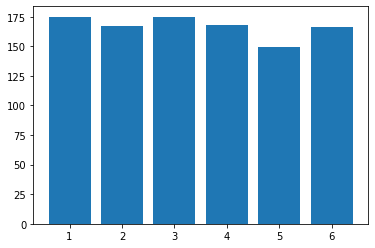

In [46]:
data_hist=data.groupby('value')['value'].count()
plt.bar(data_hist.index,data_hist.values)

In [47]:
data['value'].value_counts()

3    175
1    175
4    168
2    167
6    166
5    149
Name: value, dtype: int64

In [ ]:
"""
your comments here

Values are more distributed.

"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [48]:
# your code here
data = pd.read_csv('ages_population.csv')
data

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


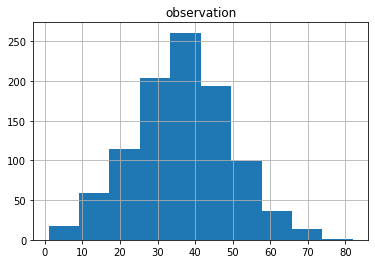

In [49]:
data.hist()
plt.show()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [52]:
# your code here
mean = data.mean()
std = data.std()

print(mean)
print(std)

observation    36.56
dtype: float64
observation    12.8165
dtype: float64


In [ ]:
"""
your comments here
Yes, viewing the plot they fall inside the ranges.
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [57]:
age_pop = pd.read_csv('ages_population2.csv')
age_pop

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0
...,...
995,26.0
996,22.0
997,21.0
998,19.0


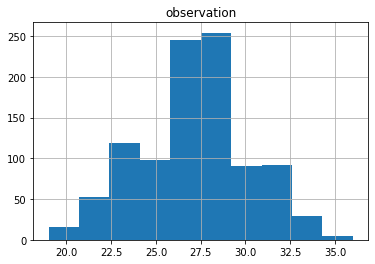

In [58]:
# your code here
age_pop.hist()
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here
There was a change in the average.
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [60]:
# your code here
mean2 = age_pop.mean()
std2 = age_pop.std()
print(mean2)
print(std2)

observation    27.155
dtype: float64
observation    2.969814
dtype: float64


In [ ]:
"""
your comments here
The value of the std is smaller, so the values are closer.

"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [62]:
# your code here
age_pop2 = pd.read_csv('ages_population3.csv')

age_pop2

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0
...,...
995,16.0
996,55.0
997,30.0
998,35.0


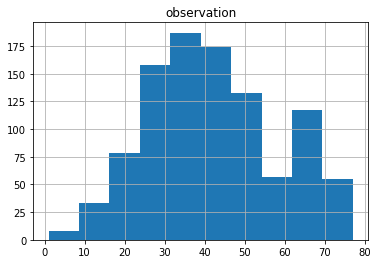

In [63]:
age_pop2.hist()
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [64]:
# your code here
mean3 = age_pop2.mean()
std3 = age_pop2.std()
print(mean3)
print(std3)

observation    41.989
dtype: float64
observation    16.144706
dtype: float64


In [ ]:
"""
your comments here

there is the oldest 70 years old, this increases the average.
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [68]:
# your code here

q1 = np.quantile(age_pop2, 0.25)
q2 = np.quantile(age_pop2, 0.50)
q3 = np.quantile(age_pop2, 0.75)
q4 = np.quantile(age_pop2, 1)
print(q1)
print(q2)
print(q3)
print(q4)

30.0
40.0
53.0
77.0


In [ ]:
"""
your comments here

The meddian is very close to the average.

"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [69]:
# your code here
np.percentile(age_pop2['observation'],[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])


array([ 1., 22., 28., 32., 36., 40., 45., 50., 57., 67., 77.])

In [ ]:
"""
your comments here
I can't see anything different with other percentages.

"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""